***Reading the dta file***

In [ ]:
import pandas as pd
df = pd.read_stata('/content/ESP08 FULL dataset 230321.dta')
print(df.head(10)) # Imprime las primeras 10 filas del DataFrame


   a_surveyn a_n42  a_n52  a_p6_3    pid a_gender  a_adultage  a_parentez  \
0       90.0          NaN     NaN   47.0    women         NaN         1.0   
1       83.0          NaN     NaN  134.0    women         NaN         1.0   
2       92.0          NaN     NaN  240.0      men         NaN         1.0   
3     1107.0          NaN     NaN  455.0      men         NaN         1.0   
4     1108.0          NaN     NaN  464.0      men         NaN         1.0   
5     1108.0          NaN     NaN  466.0      men         NaN         1.0   
6     1046.0          NaN     NaN  624.0      men         NaN         1.0   
7     1049.0          NaN     NaN  742.0    women         NaN         1.0   
8     1049.0          NaN     NaN  743.0      men         NaN         1.0   
9     1044.0          NaN     NaN  759.0      men         NaN         1.0   

     a_race a_d51cual  ...  a_occupato  a_var1054  a_flori  a_agric_nonflower  \
0   Mestizo         0  ...         NaN        4.0      0.0             

***Transforming the dta file to excel for having better visualization***

---



In [ ]:
import pandas as pd

# Leer archivo DTA
df = pd.read_stata('/content/ESP08 FULL dataset 230321.dta')

# Escribir archivo de Excel
df.to_excel('Encuesta_padres.xlsx', index=False)


***Inner join left ID participantes***

---

In [ ]:
import pandas as pd

# Leer archivos de Excel
df1 = pd.read_excel('archivo1.xlsx')
df2 = pd.read_excel('archivo2.xlsx')

# Unir DataFrames utilizando ID como clave de unión
df = pd.merge(df1, df2[['ID', 'datos_nuevos']], on='ID', how='left')

# Escribir archivo de Excel resultante
df.to_excel('archivo_unido.xlsx', index=False)


***Data del 2008 representacion total solo floricultor, agricultor y floricultor, y no agricultor no floricultor***

---

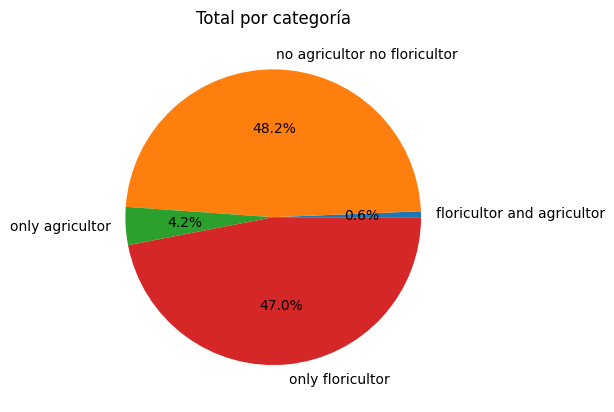

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo de Excel en un objeto de DataFrame
df = pd.read_excel('Encuesta_padres.xlsx')

# Contar el total por cada categoría
total_por_categoria = df.groupby('a_categocup').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['a_noflonoagr'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría')
plt.show()


***Primer analisis estatura promedio vs oficio de padres (referencia grafica anterior)***

---

In [ ]:
import pandas as pd

# Leer los dos archivos de Excel en objetos de DataFrame
df1 = pd.read_excel('/content/ESP 22 Base de datos de antropometria 230322.xlsx')
df2 = pd.read_excel('/content/Encuesta_padres.xlsx')

# Seleccionar las columnas necesarias del archivo 1
df1 = df1.loc[:, ['nid','d_gender', 'd_height']]
# Seleccionar las columnas necesarias del archivo 2
df2 = df2.loc[:, ['nid', 'a_categocup']]

# Combinar los dos DataFrames utilizando el ID como clave de unión
df_combinado = pd.merge(df1, df2, on='nid', how='left')

# Guardar el DataFrame combinado en un nuevo archivo de Excel
df_combinado.to_excel('archivo_combinado.xlsx', index=False)


***Rellenando la columna a_categocup con la palabra "no assigned" para los participantes nuevos de los que no hay informacion sobre la ocupacion de sus padres en el 2008***

---

In [ ]:
import pandas as pd

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('archivo_combinado.xlsx')

# Reemplazar los valores vacíos en la columna a_categocup con la cadena 'no assigned'
df['a_categocup'] = df['a_categocup'].fillna('no assigned')

# Guardar el DataFrame actualizado en un nuevo archivo de Excel
df.to_excel('archivo_actualizado.xlsx', index=False)


***Separando hombres de mujeres***

---

In [ ]:
import pandas as pd

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('archivo_actualizado.xlsx')

# Seleccionar solo las filas de mujeres (genero = 'F') en un nuevo DataFrame
df_mujeres = df.loc[df['d_gender'] == 'Mujer']

# Seleccionar solo las filas de hombres (genero = 'M') en un nuevo DataFrame
df_hombres = df.loc[df['d_gender'] == 'Hombre']

# Guardar el DataFrame de mujeres en un nuevo archivo de Excel
df_mujeres.to_excel('mujeres.xlsx', index=False)

# Guardar el DataFrame de hombres en un nuevo archivo de Excel
df_hombres.to_excel('hombres.xlsx', index=False)

print(df_hombres)

         nid d_gender  d_height                   a_categocup
2     116832   Hombre     170.7  no agricultor no floricultor
3     160019   Hombre     162.0  no agricultor no floricultor
4     500013   Hombre     171.6  no agricultor no floricultor
5     500039   Hombre     173.2  no agricultor no floricultor
9     500056   Hombre     154.1              only floricultor
..       ...      ...       ...                           ...
494   546006   Hombre     170.7                   no assigned
496   546011   Hombre     172.5                   no assigned
498   546013   Hombre     152.0                   no assigned
499   546014   Hombre     174.5                   no assigned
503  5405181   Hombre     155.6                   no assigned

[249 rows x 4 columns]


***Hombres menores a 167.0 cm de altura y su relación con la profesión de sus padres en su niñez***

---

        nid d_gender  d_height                   a_categocup
1    160019   Hombre     162.0  no agricultor no floricultor
4    500056   Hombre     154.1              only floricultor
19   500115   Hombre     162.0              only floricultor
22   500137   Hombre     163.5  no agricultor no floricultor
54   510045   Hombre     155.4  no agricultor no floricultor
55   510049   Hombre     166.4  no agricultor no floricultor
59   510114   Hombre     161.6  no agricultor no floricultor
60   510138   Hombre     165.7  no agricultor no floricultor
62   510162   Hombre     166.4  no agricultor no floricultor
63   510164   Hombre     165.4  no agricultor no floricultor
70   510220   Hombre     166.3              only floricultor
71   510222   Hombre     163.9  no agricultor no floricultor
72   510226   Hombre     163.0  no agricultor no floricultor
73   510229   Hombre     163.9  no agricultor no floricultor
74   510231   Hombre     162.8  no agricultor no floricultor
96   520029   Hombre    

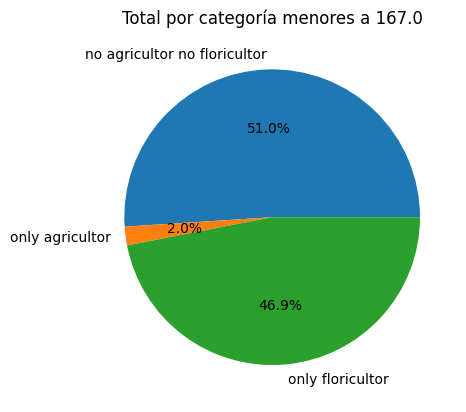

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('hombres.xlsx')
df = df[df["a_categocup"] != "no assigned"]
# Filtrar las filas donde la columna 'estatura' es menor a 167.0
df_filtrado = df.loc[df['d_height'] < 167.0]

# Guardar el DataFrame filtrado en un nuevo archivo de Excel
df_filtrado.to_excel('hombres_estatura_profesion.xlsx', index=False)

print(df_filtrado)

#Se grafica el total de hombres con estatura menor a 167.0 en relaci'on a la profesión de sus padres

# Leer archivo de Excel en un objeto de DataFrame
df = pd.read_excel('hombres_estatura_profesion.xlsx')

# Contar el total por cada categoría
total_por_categoria = df.groupby('a_categocup').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['d_gender'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría menores a 167.0')
plt.show()

***Mujeres menores a 154.0 cm de altura y su relación con la profesión de sus padres en su niñez***

---

        nid d_gender  d_height                   a_categocup
1    109710    Mujer     152.6              only floricultor
3    500052    Mujer     152.2              only floricultor
4    500055    Mujer     144.4              only floricultor
5    500057    Mujer     152.5              only floricultor
18   500131    Mujer     151.7              only floricultor
19   500144    Mujer     151.1              only floricultor
54   510099    Mujer     152.0  no agricultor no floricultor
55   510113    Mujer     144.9  no agricultor no floricultor
56   510132    Mujer     152.0    floricultor and agricultor
58   510155    Mujer     150.5  no agricultor no floricultor
59   510156    Mujer     153.5  no agricultor no floricultor
61   510159    Mujer     151.3  no agricultor no floricultor
62   510160    Mujer     153.3  no agricultor no floricultor
63   510161    Mujer     149.6  no agricultor no floricultor
71   510230    Mujer     147.3  no agricultor no floricultor
107  520004    Mujer    

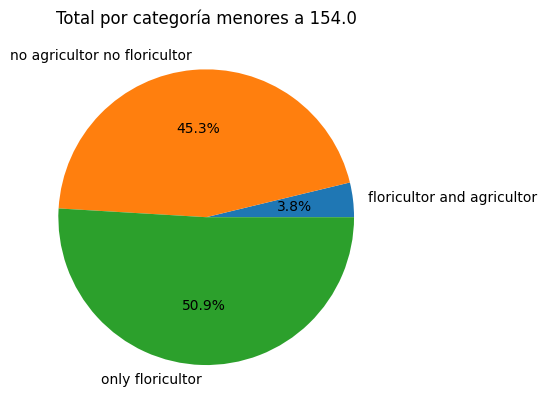

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('mujeres.xlsx')
df = df[df["a_categocup"] != "no assigned"]
# Filtrar las filas donde la columna 'estatura' es menor a 154.0
df_filtrado = df.loc[df['d_height'] < 154.0]

# Guardar el DataFrame filtrado en un nuevo archivo de Excel
df_filtrado.to_excel('mujeres_estatura_profesion.xlsx', index=False)

print(df_filtrado)

#Se grafica el total de hombres con estatura menor a 154.0 en relaci'on a la profesión de sus padres

# Leer archivo de Excel en un objeto de DataFrame
df = pd.read_excel('mujeres_estatura_profesion.xlsx')

# Contar el total por cada categoría
total_por_categoria = df.groupby('a_categocup').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['d_gender'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría menores a 154.0')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_stata('/content/1600 ESPINA CARACTERIZACION 200828.dta')
print(df.head(10)) # Imprime las primeras 10 filas del DataFrame



        nid  bc_parish child1604 child1608 bc_gender bc_birthdate  \
0  500010.0  TABACUNDO        SI        NO     MUJER   2002-12-09   
1  500013.0  TABACUNDO        SI        SI    HOMBRE   2000-05-18   
2  500018.0  TABACUNDO        SI        SI     MUJER   2001-02-28   
3  500020.0  TABACUNDO        SI        SI     MUJER   2003-07-16   
4  500039.0  TABACUNDO        SI        SI    HOMBRE   2001-11-19   
5  500046.0  TABACUNDO        SI        SI     MUJER   2004-01-05   
6  500052.0  TABACUNDO        SI        SI     MUJER   2000-10-10   
7  500054.0  TABACUNDO        SI        SI    HOMBRE   2004-01-16   
8  500055.0  TABACUNDO        SI        SI     MUJER   2002-06-06   
9  500056.0  TABACUNDO        SI        SI    HOMBRE   1999-12-25   

   bc_agereportedbychild bc_observations  ab_child  ac_child  \
0                   13.0                       1.0       0.0   
1                   16.0                       1.0       1.0   
2                   15.0                       1

In [ ]:
import pandas as pd

# Leer archivo DTA
df = pd.read_stata('/content/1604 ESPINA ESPIROMETRIA 220222.dta')

# Escribir archivo de Excel
df.to_excel('espirometria2016.xlsx', index=False)



***A continuación se analizará los resultados antropométricos de los participantes en el 2016, haciendo énfasis en el estado b_hgb***

---

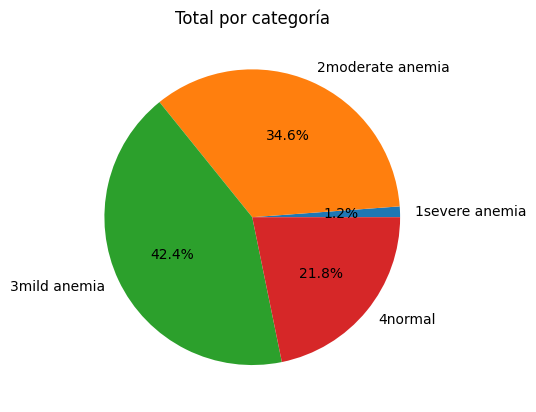

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo de Excel en un objeto de DataFrame
df = pd.read_excel('antropometria2016.xlsx')

# Contar el total por cada categoría
total_por_categoria = df.groupby('b_hgb_status').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['b_bp_status'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría')
plt.show()


***A continuacion se hara el analisis correspondiente para comprobar si el b_bp_status esta influenciado por la ocupacion de sus padres en el año 2008***

---


In [ ]:
import pandas as pd

# Leer los dos archivos de Excel en objetos de DataFrame
df1 = pd.read_excel('/content/antropometria2016.xlsx')
df2 = pd.read_excel('/content/archivo.xlsx')

# Seleccionar las columnas necesarias del archivo 1
df1 = df1.loc[:, ['nid','b_hgb_status']]
# Seleccionar las columnas necesarias del archivo 2
df2 = df2.loc[:, ['nid', 'a_categocup']]

# Combinar los dos DataFrames utilizando el ID como clave de unión
df_combinado = pd.merge(df1, df2, on='nid', how='left')

# Guardar el DataFrame combinado en un nuevo archivo de Excel
df_combinado.to_excel('inner_antro2016.xlsx', index=False)

print(df_combinado)

        nid      b_hgb_status                   a_categocup
0    500010      3mild anemia  no agricultor no floricultor
1    500013  2moderate anemia  no agricultor no floricultor
2    500018               NaN  no agricultor no floricultor
3    500020  2moderate anemia  no agricultor no floricultor
4    500039      3mild anemia  no agricultor no floricultor
..      ...               ...                           ...
325  540453      3mild anemia                           NaN
326  540454  2moderate anemia                           NaN
327  540455               NaN                           NaN
328  540456  2moderate anemia                           NaN
329  540457  2moderate anemia                           NaN

[330 rows x 3 columns]


***Rellenando la columna a_categocup con la palabra "no assigned" para los participantes del 2016 de los que no hay informacion sobre la ocupacion de sus padres en el 2008***

---

In [ ]:
import pandas as pd

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('inner_antro2016.xlsx')

# Reemplazar los valores vacíos en la columna a_categocup con la cadena 'no assigned'
df['a_categocup'] = df['a_categocup'].fillna('no assigned')
df['b_hgb_status'] = df['b_hgb_status'].fillna('no assigned')
df = df[df["a_categocup"] != "no assigned"]
df = df[df["b_hgb_status"] != "no assigned"]
# Guardar el DataFrame actualizado en un nuevo archivo de Excel
df.to_excel('inner_actualizado2016.xlsx', index=False)

print(df)

        nid      b_hgb_status                   a_categocup
0    500010      3mild anemia  no agricultor no floricultor
1    500013  2moderate anemia  no agricultor no floricultor
3    500020  2moderate anemia  no agricultor no floricultor
4    500039      3mild anemia  no agricultor no floricultor
5    500046           4normal              only floricultor
..      ...               ...                           ...
300  540338           4normal              only floricultor
302  540348  2moderate anemia              only floricultor
305  540352      3mild anemia              only floricultor
307  540357      3mild anemia              only floricultor
308  540358  2moderate anemia              only floricultor

[112 rows x 3 columns]


***Plot del b_hgb_sttus en relacion a la ocupacion de los padres en el 2008***

---

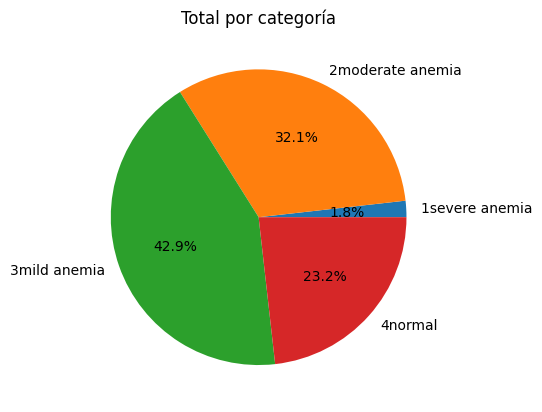

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer archivo de Excel en un objeto de DataFrame
df = pd.read_excel('inner_actualizado2016.xlsx')

# Eliminar filas con "no assigned" en la columna "categoria"
df = df[df["a_categocup"] != "no assigned"]


# Contar el total por cada categoría
total_por_categoria = df.groupby('b_hgb_status').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['nid'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría')
plt.show()

***ahora se observara 1 a 1 cada tipo de anemia y la ocupacion de los padres de los participantes que la padecen***

----

        nid    b_hgb_status                   a_categocup
30   520004  1severe anemia  no agricultor no floricultor
100  540216  1severe anemia  no agricultor no floricultor
                              nid  b_hgb_status
a_categocup                                    
no agricultor no floricultor    2             2


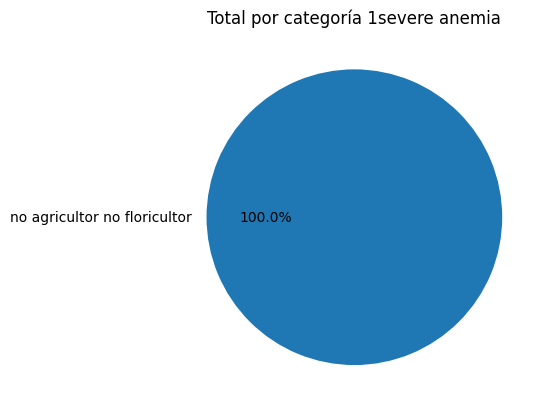

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('inner_actualizado2016.xlsx')
df = df[df["a_categocup"] != "no assigned"]
# Seleccionar solo las filas de participantes que tengan 1severe anemia

df_type = df.loc[df['b_hgb_status'] == '1severe anemia']
print(df_type)

#Se grafica el total de participantes con 1severe anemia y  a la profesión de sus padres

# Contar el total por cada categoría
total_por_categoria = df_type.groupby('a_categocup').count()
print (total_por_categoria)
# Crear gráfico de pastel
plt.pie(total_por_categoria['nid'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría 1severe anemia')
plt.show()

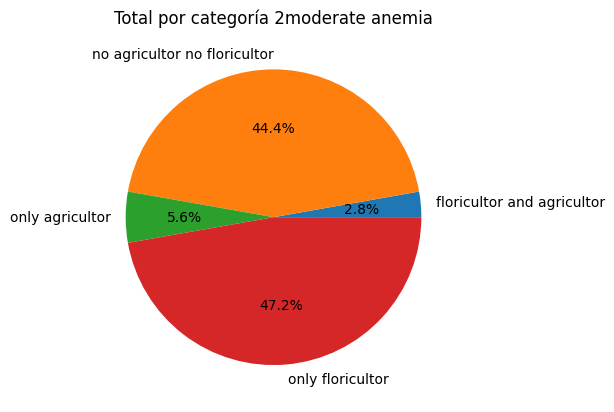

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('inner_actualizado2016.xlsx')
df = df[df["a_categocup"] != "no assigned"]
# Seleccionar solo las filas de participantes que tengan 1severe anemia

df_type = df.loc[df['b_hgb_status'] == '2moderate anemia']

#Se grafica el total de participantes con 1severe anemia y  a la profesión de sus padres

# Contar el total por cada categoría
total_por_categoria = df_type.groupby('a_categocup').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['nid'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría 2moderate anemia')
plt.show()

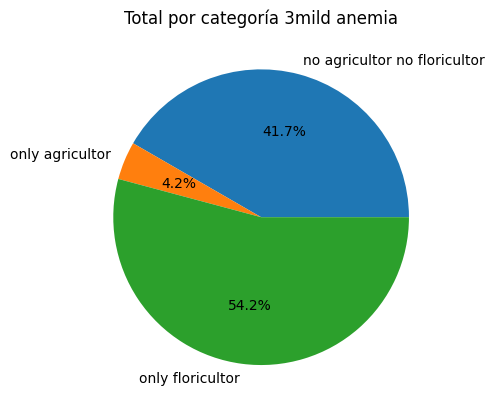

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('inner_actualizado2016.xlsx')
df = df[df["a_categocup"] != "no assigned"]
# Seleccionar solo las filas de participantes que tengan 1severe anemia

df_type = df.loc[df['b_hgb_status'] == '3mild anemia']

#Se grafica el total de participantes con 1severe anemia y  a la profesión de sus padres

# Contar el total por cada categoría
total_por_categoria = df_type.groupby('a_categocup').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['nid'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría 3mild anemia')
plt.show()

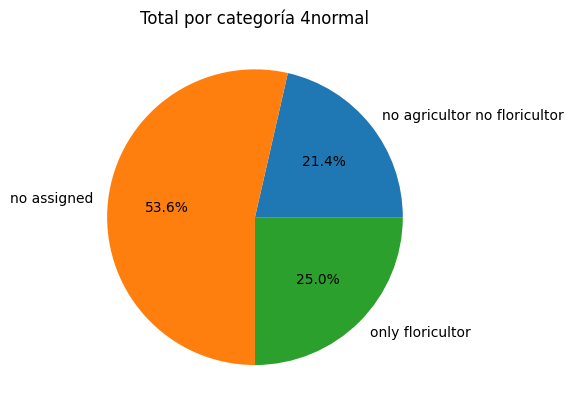

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel en un objeto de DataFrame
df = pd.read_excel('inner_actualizado2016.xlsx')

#df = df[df["a_categocup"] != "no assigned"]

# Seleccionar solo las filas de participantes que tengan 1severe anemia

df_type = df.loc[df['b_hgb_status'] == '4normal']

#Se grafica el total de participantes con 1severe anemia y  a la profesión de sus padres

# Contar el total por cada categoría
total_por_categoria = df_type.groupby('a_categocup').count()

# Crear gráfico de pastel
plt.pie(total_por_categoria['nid'], labels=total_por_categoria.index, autopct='%1.1f%%')
plt.title('Total por categoría 4normal')
plt.show()

***Chi2 analysis for checking if the relation of parents with floricultor from participants in their childhood***

---

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Leer los datos del archivo de Excel y convertirlos en un dataframe de pandas
datos = pd.read_excel('inner_actualizado2016.xlsx')
print(datos)
# Crear una matriz de contingencia con los datos
matriz_contingencia = pd.crosstab(datos['a_categocup'], datos['b_hgb_status'])

# Realizar el análisis de chi cuadrado y obtener los resultados
estadistico, p_valor, grados_libertad, esperados = chi2_contingency(matriz_contingencia)

# Imprimir los resultados
print("Estadístico de chi cuadrado:", estadistico)
print("P-valor:", p_valor)
print("Grados de libertad:", grados_libertad)
print("Valores esperados:", esperados)


        nid      b_hgb_status                   a_categocup
0    500010      3mild anemia  no agricultor no floricultor
1    500013  2moderate anemia  no agricultor no floricultor
2    500020  2moderate anemia  no agricultor no floricultor
3    500039      3mild anemia  no agricultor no floricultor
4    500046           4normal              only floricultor
..      ...               ...                           ...
107  540338           4normal              only floricultor
108  540348  2moderate anemia              only floricultor
109  540352      3mild anemia              only floricultor
110  540357      3mild anemia              only floricultor
111  540358  2moderate anemia              only floricultor

[112 rows x 3 columns]
Estadístico de chi cuadrado: 6.296074373969111
P-valor: 0.7099590575117956
Grados de libertad: 9
Valores esperados: [[1.78571429e-02 3.21428571e-01 4.28571429e-01 2.32142857e-01]
 [8.92857143e-01 1.60714286e+01 2.14285714e+01 1.16071429e+01]
 [7.14285714e-

***Z values for height 2022***

---

Media:  159.10831683168317
Desviación estándar:  8.82315417762786


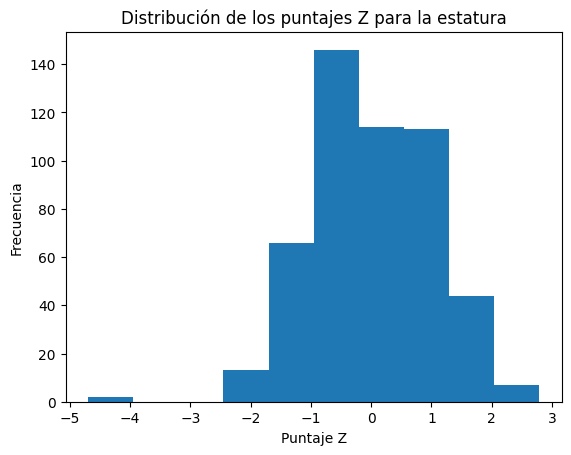

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los datos desde el archivo Excel
datos = pd.read_excel('/content/ESP 22 Base de datos de antropometria 230322.xlsx')

# Calcular la media y la desviación estándar de la columna de altura

media = np.mean(datos['d_height'])
desviacion_estandar = np.std(datos['d_height'])
print('Media: ',media)
print('Desviacion estandar: ',desviacion_estandar)
# Calcular los puntajes Z
datos['puntaje_z altura'] = (datos['d_height'] - media) / desviacion_estandar
# Guardar los puntaje Z
# datos['Puntaje Z ']= datos['puntaje_z']
# Guardar datos en un nuevo documento de excel
datos.to_excel('Antropometria_con_puntajeZ.xlsx', index=False)
# Crear un histograma de los puntajes Z
plt.hist(datos['puntaje_z altura'], bins=10)
plt.title('Distribución de los puntajes Z para la estatura')
plt.xlabel('Puntaje Z')
plt.ylabel('Frecuencia')
plt.show()


***Z values for height (women)***

---

Media:  152.84296875
Desviacion estandar:  6.2110182286420175


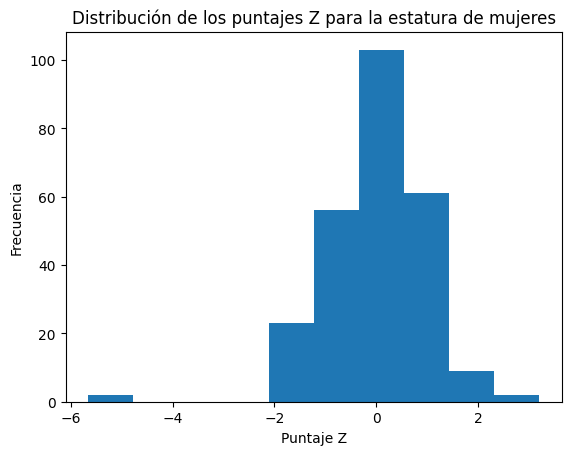

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los datos desde el archivo Excel
datos = pd.read_excel('/content/ESP 22 Base de datos de antropometria 230322.xlsx')
# Seleccionar solo las filas de mujeres (genero = 'F') en un nuevo DataFrame
datos.loc[datos['d_gender'] == 'Mujer', 'd_gender'] = 'Mujer'
datos2 = datos.loc[datos['d_gender'] == 'Mujer'].copy()
# Calcular la media y la desviación estándar de la columna de altura

media = np.mean(datos2['d_height'])
desviacion_estandar = np.std(datos2['d_height'])
print('Media: ',media)
print('Desviacion estandar: ',desviacion_estandar)
# Calcular los puntajes Z
datos2['puntaje_z altura'] = (datos2['d_height'] - media) / desviacion_estandar
# Guardar los puntaje Z
# datos['Puntaje Z ']= datos['puntaje_z']
# Guardar datos en un nuevo documento de excel
#datos.to_excel('Antropometria_con_puntajeZ.xlsx', index=False)
# Crear un histograma de los puntajes Z
plt.hist(datos2['puntaje_z altura'], bins=10)
plt.title('Distribución de los puntajes Z para la estatura de mujeres')
plt.xlabel('Puntaje Z')
plt.ylabel('Frecuencia')
plt.show()


***puntaje Z para estatura de hombres***

---

Media:  165.54979919678715
Desviacion estandar:  6.03096510687308


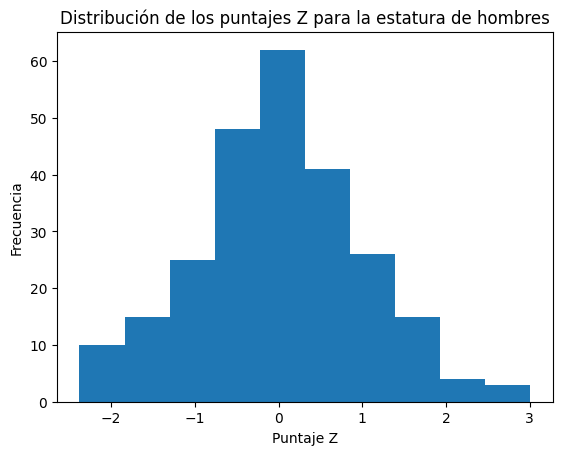

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los datos desde el archivo Excel
datos = pd.read_excel('/content/ESP 22 Base de datos de antropometria 230322.xlsx')
# Seleccionar solo las filas de mujeres (genero = 'F') en un nuevo DataFrame
datos.loc[datos['d_gender'] == 'Hombre', 'd_gender'] = 'Hombre'
datos2 = datos.loc[datos['d_gender'] == 'Hombre'].copy()
# Calcular la media y la desviación estándar de la columna de altura

media = np.mean(datos2['d_height'])
desviacion_estandar = np.std(datos2['d_height'])
print('Media: ',media)
print('Desviacion estandar: ',desviacion_estandar)
# Calcular los puntajes Z
datos2['puntaje_z altura'] = (datos2['d_height'] - media) / desviacion_estandar
# Guardar los puntaje Z
# datos['Puntaje Z ']= datos['puntaje_z']
# Guardar datos en un nuevo documento de excel
#datos.to_excel('Antropometria_con_puntajeZ.xlsx', index=False)
# Crear un histograma de los puntajes Z
plt.hist(datos2['puntaje_z altura'], bins=10)
plt.title('Distribución de los puntajes Z para la estatura de hombres')
plt.xlabel('Puntaje Z')
plt.ylabel('Frecuencia')
plt.show()



---



***Z values for colinesterasa 2022***

---

Media:  13.787326732673266
Desviacion estandar:  1.5169790792588822
Media:  14.695209580838323
Desviacion estandar:  1.7781937633082308


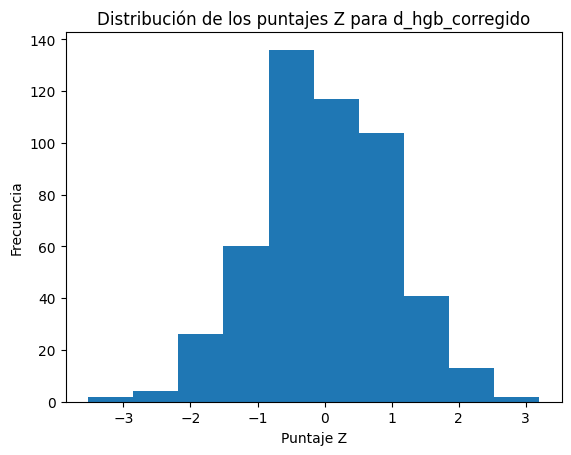

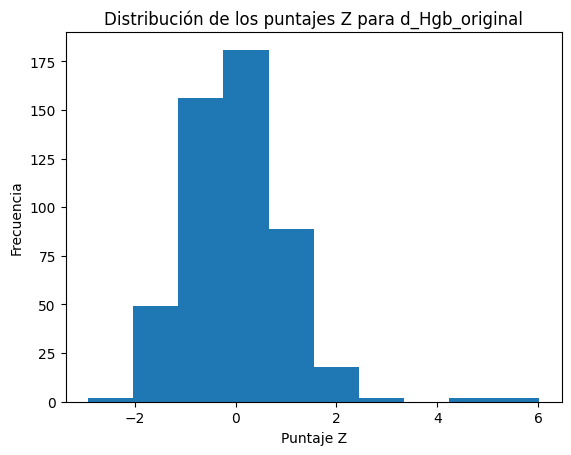

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los datos desde el archivo Excel
datos = pd.read_excel('/content/ESP 22 Base de datos colinesterasa 230322.xlsx')

# Calcular la media y la desviación estándar de la columna de altura
media = np.mean(datos['d_hgb_corregido'])
desviacion_estandar = np.std(datos['d_hgb_corregido'])
print('Media: ',media)
print('Desviacion estandar: ',desviacion_estandar)
# Calcular los puntajes Z
datos['puntaje_z_d_hgb_corregido'] = (datos['d_hgb_corregido'] - media) / desviacion_estandar
print('================================')
#-----------------------------------------------------------------------------------------------
# Calcular la media y la desviación estándar de la columna de altura
media = np.mean(datos['d_Hgb_original'])
desviacion_estandar = np.std(datos['d_Hgb_original'])
print('Media: ',media)
print('Desviacion estandar: ',desviacion_estandar)
# Calcular los puntajes Z
datos['puntaje_z_d_Hgb_original'] = (datos['d_Hgb_original'] - media) / desviacion_estandar
datos.to_excel('colinesterasa_con_puntajeZ.xlsx', index=False)

# Crear un histograma de los puntajes Z
plt.hist(datos['puntaje_z_d_hgb_corregido'], bins=10)
plt.title('Distribución de los puntajes Z para d_hgb_corregido')
plt.xlabel('Puntaje Z')
plt.ylabel('Frecuencia')
plt.show()

# Crear un histograma de los puntajes Z
plt.hist(datos['puntaje_z_d_Hgb_original'], bins=10)
plt.title('Distribución de los puntajes Z para d_Hgb_original')
plt.xlabel('Puntaje Z')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Leer los datos desde el archivo Excel
datos = pd.read_excel('/content/colinesterasa_con_puntajeZ.xlsx')
print(datos)

        nid  d_hgb_corregido  d_temperatureacheexam  d_ache  d_ache_pct  \
0    105510            12.34                   18.2    4.27        91.0   
1    109710            14.04                   18.6    4.42        94.0   
2    500107            13.34                   19.1    4.69       100.0   
3    510010            13.44                   17.7    3.70        79.0   
4    510021            14.14                   17.9    4.28        91.0   
..      ...              ...                    ...     ...         ...   
500  546017            12.84                   20.3    3.87        82.0   
501  500183            15.94                    NaN     NaN         NaN   
502  510294            11.54                    NaN     NaN         NaN   
503  520102            12.64                    NaN     NaN         NaN   
504  540490            13.84                    NaN     NaN         NaN   

     d_Hgb_original  d_hgb_pct   d_q  d_q_pct d_tecnico_colinesterasa  \
0              12.7       

***Grupos Espina (floricultores, agricultores, no floricultores no agricultores)***

---

In [ ]:
import pandas as pd

# Leer los dos archivos de Excel en objetos de DataFrame
df1 = pd.read_excel('/content/ESP 22 Base de datos de antropometria 230322.xlsx')
df2 = pd.read_excel('/content/Encuesta_padres.xlsx')

# Seleccionar las columnas necesarias del archivo 1
df1 = df1.loc[:, ['nid','d_gender', 'd_height']]
# Seleccionar las columnas necesarias del archivo 2
df2 = df2.loc[:, ['nid', 'a_categocup']]

# Combinar los dos DataFrames utilizando el ID como clave de unión
df_combinado = pd.merge(df1, df2, on='nid', how='left')

# Guardar el DataFrame combinado en un nuevo archivo de Excel
df_combinado.to_excel('archivo_combinado.xlsx', index=False)
